In [ ]:
%pip install -r requirements.txt

import warnings
warnings.filterwarnings("ignore")

In [13]:
"""
Prefix zip code của Brazil được xây dựng theo cách 2 chữ số đầu tiên xác định tiểu bang và phần còn lại xác định các tiểu vùng của tiểu bang.
Sử dụng chỉ mỗi prefix zip code vì cột state và city name không liên quan đến thời gian giao hàng.
Một vài zip code bị thiếu nên tôi đã dùng hàm reindex và interpolate để fill vào các ô bị thiếu bằng giá trị lat và lon gần nhất
"""

import numpy as np
import pandas as pd
ogd = pd.read_csv("data/olist_geolocation_dataset.csv").drop(['geolocation_city', 'geolocation_state'], axis = 1)
ogd = ogd.groupby('geolocation_zip_code_prefix').mean()
ogd = ogd.reindex(np.arange(ogd.index.min(), ogd.index.max() + 1)).interpolate(method = 'nearest')
ogd

,geolocation_lat,geolocation_lng
geolocation_zip_code_prefix,,
1001,-23.550190,-46.634024
1002,-23.548146,-46.634979
1003,-23.548994,-46.635731
1004,-23.549799,-46.634757
1005,-23.549456,-46.636733
...,...,...
99986,-28.329595,-51.769362
99987,-28.329595,-51.769362
99988,-28.329595,-51.769362


<Axes: xlabel='geolocation_lng', ylabel='geolocation_lat'>

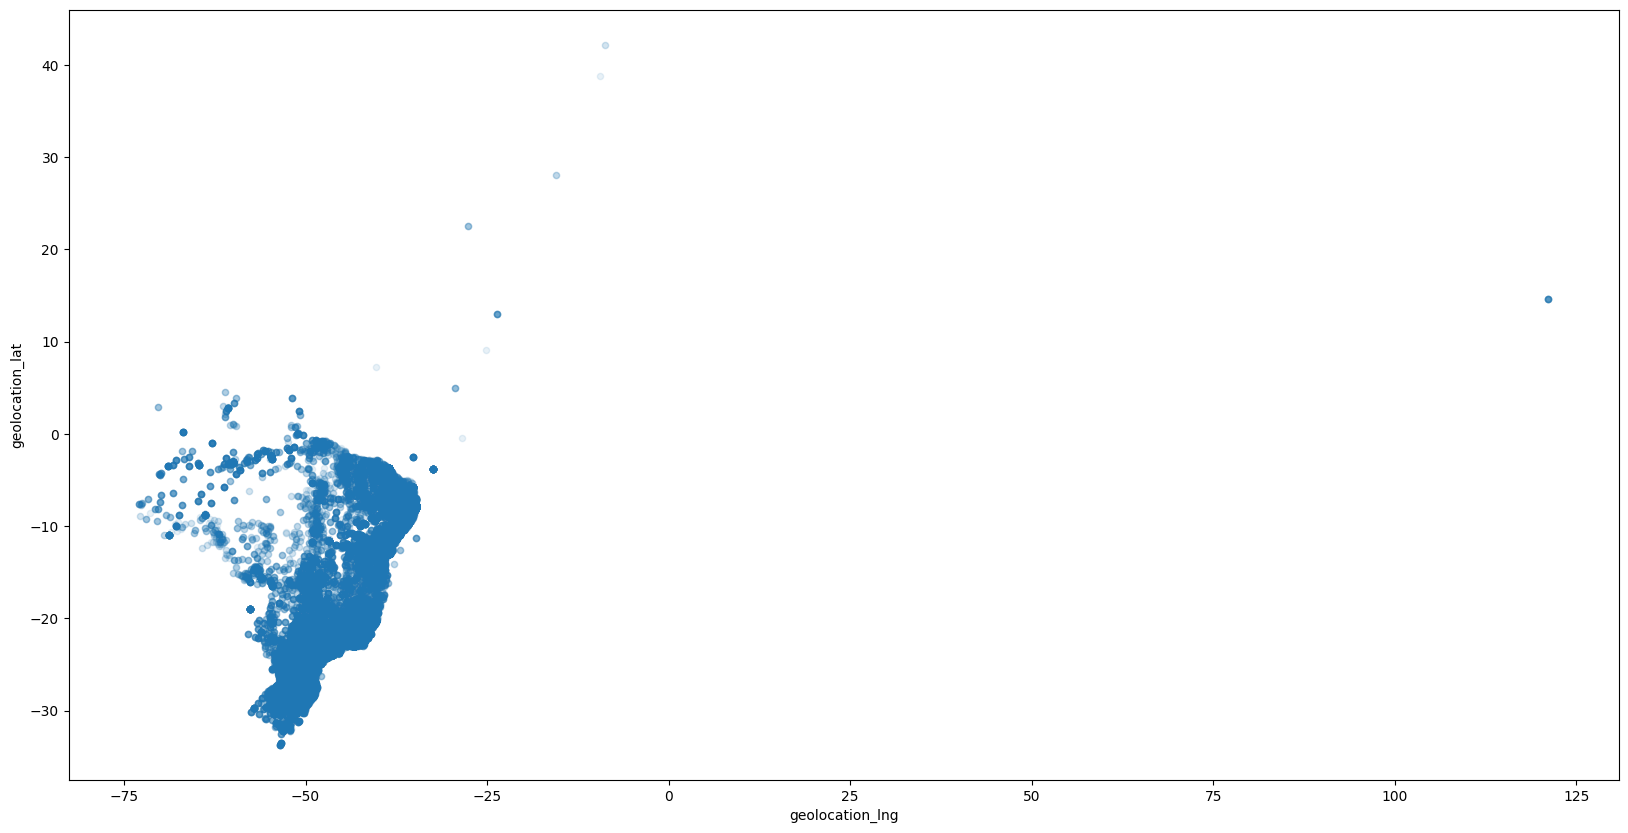

In [31]:
"""
Từ biểu đồ ta nhận thấy có 1 số điểm nằm ngoài lãnh thỗ Brazil, hoặc do bộ dữ liệu có những trường bị lỗi
"""

ogd.plot(kind = 'scatter', x = 'geolocation_lng', y = 'geolocation_lat', alpha = 0.1, figsize=(20, 10))

In [14]:
"""
Tôi dùng dữ liệu geolocation để tính ra địa chỉ của mỗi khách hàng.
Như đã nhắc tới ở trên thì tôi nghĩ dữ liệu liên quan đến state và city không ảnh hưởng đến khả năng giao hàng đúng hạn.
"""

ocd = pd.read_csv("data/olist_customers_dataset.csv").drop(['customer_unique_id', 'customer_city', 'customer_state'], axis = 1)
ocd = pd.merge(ocd, ogd, left_on = 'customer_zip_code_prefix', right_index = True).drop(['customer_zip_code_prefix'], axis = 1)
ocd

,customer_id,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,-20.498489,-47.396929
650,5dca924cc99eea2dc5ba40d11ec5dd0f,-20.498489,-47.396929
3979,661897d4968f1b59bfff74c7eb2eb4fc,-20.498489,-47.396929
12079,702b62324327ccba20f1be3465426437,-20.498489,-47.396929
12641,bdf997bae7ca819b0415f5174d6b4302,-20.498489,-47.396929
...,...,...,...
99376,0b7a30ba373aeb55cf28add5b5477956,-23.501806,-52.150926
99379,ff6b440b2465bfaef05c675efb48cd15,-28.527590,-54.145960
99382,3f7029d9b98a47370cd5f3a97adcbccd,-23.588483,-46.737908
99406,d9110683c7a282144e9fc97660026a28,-16.822735,-49.248175


<Axes: xlabel='geolocation_lng', ylabel='geolocation_lat'>

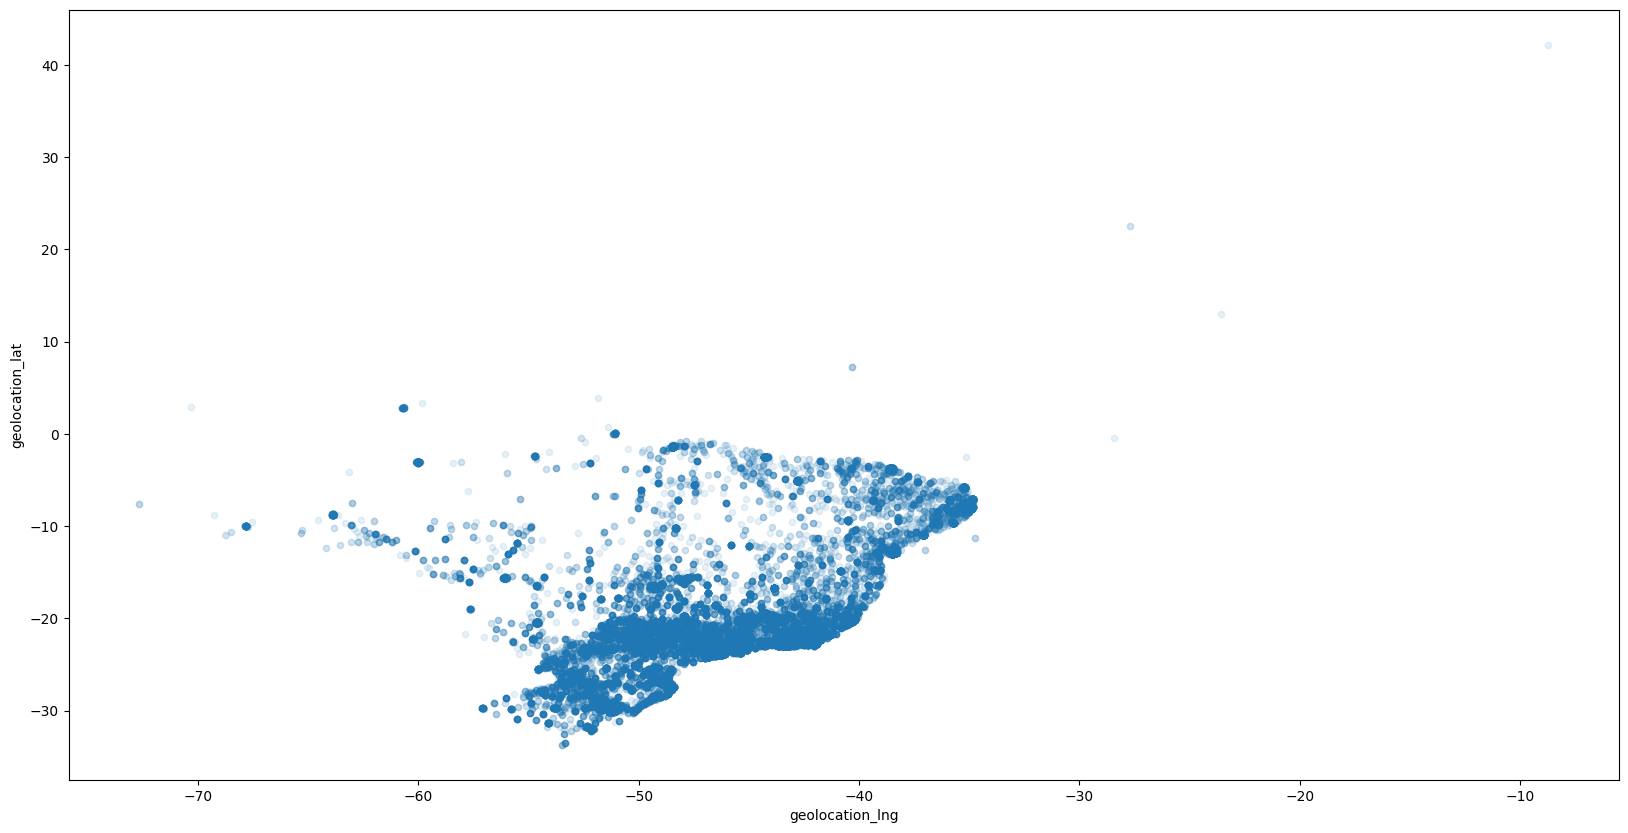

In [33]:
"""
Phần lớn khách hàng ở đông và nam Brazil
"""

ocd.plot(kind = 'scatter', x = 'geolocation_lng', y = 'geolocation_lat', alpha = 0.1, figsize=(20, 10))

In [15]:
"""
Tôi dùng dữ liệu geolocation để tính ra địa chỉ của mỗi nhà bán hàng.
Như đã nhắc tới ở trên thì tôi nghĩ dữ liệu liên quan đến state và city không ảnh hưởng đến khả năng giao hàng đúng hạn.
"""

osd = pd.read_csv("data/olist_sellers_dataset.csv").drop(['seller_city', 'seller_state'], axis = 1)
osd = pd.merge(osd, ogd, left_on = 'seller_zip_code_prefix', right_index = True).drop(['seller_zip_code_prefix'], axis = 1)
osd

,seller_id,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,-22.893848,-47.061337
1810,e0eabded302882513ced4ea3eb0c7059,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,-22.909572,-43.177703
1226,1d2732ef8321502ee8488e8bed1ab8cd,-22.909572,-43.177703
...,...,...,...
3089,f1fdf2d13186575751aa25876536d85c,-23.530647,-46.736453
3090,98dddbc4601dd4443ca174359b237166,-23.448041,-51.869960
3092,74871d19219c7d518d0090283e03c137,-23.657851,-46.676925
3093,e603cf3fec55f8697c9059638d6c8eb5,-31.751072,-52.323202


<Axes: xlabel='geolocation_lng', ylabel='geolocation_lat'>

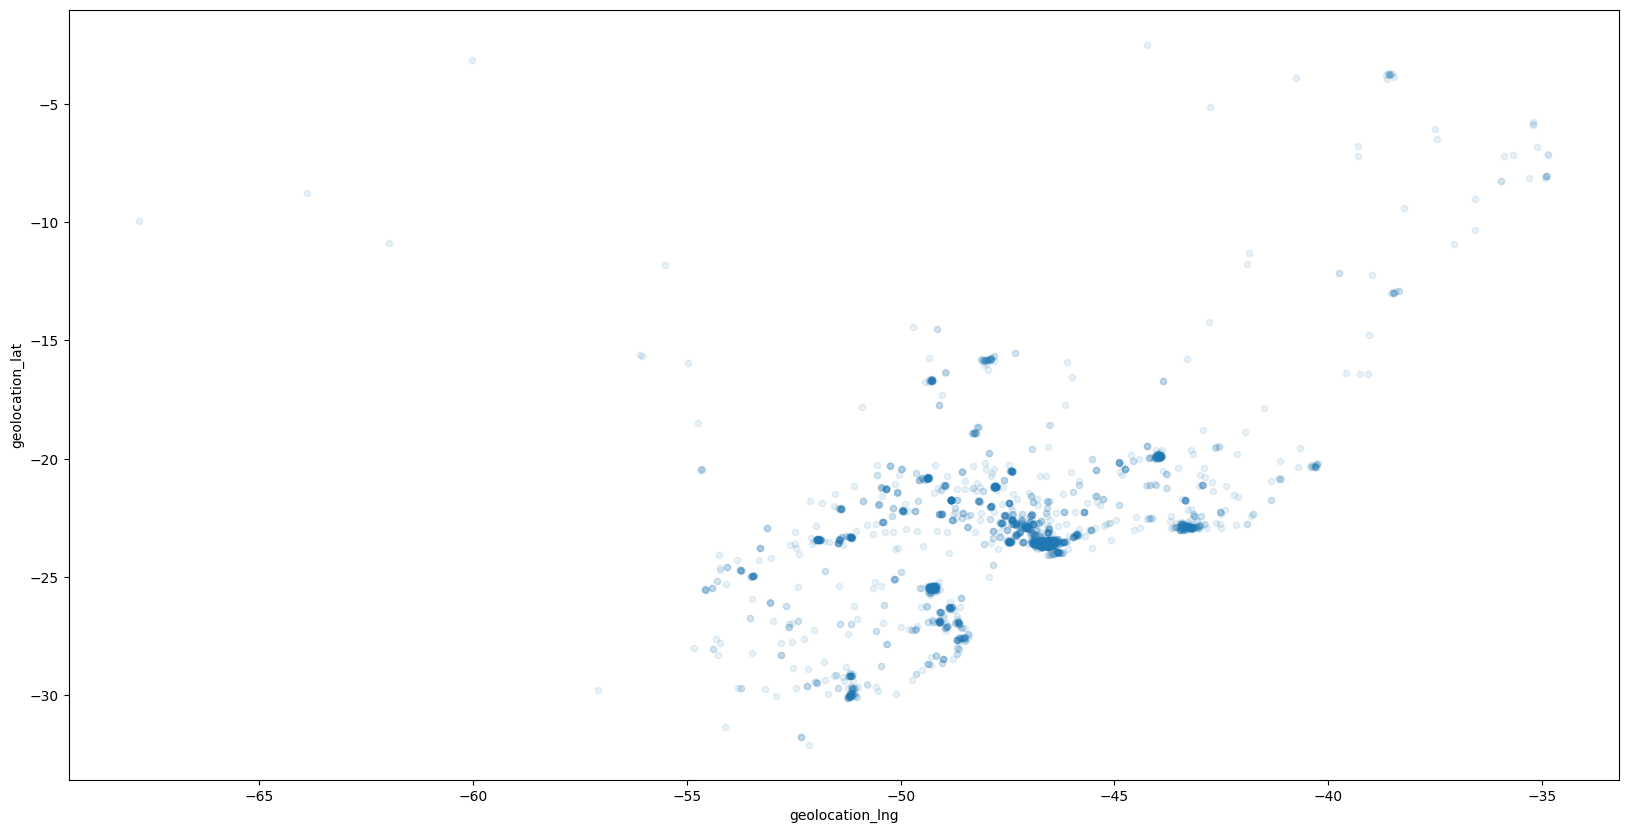

In [69]:
"""
Vị trí của các nhà bán hàng
"""

osd.plot(kind = 'scatter', x = 'geolocation_lng', y = 'geolocation_lat', alpha = 0.1, figsize=(20, 10))

In [16]:
"""
Độ dài tên sản phẩm, độ dài mô tả, số lượng ảnh không ảnh hưởng đến khả năng giao hàng đúng hạn
"""

opd = pd.read_csv("data/olist_products_dataset.csv").drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty'],
                                                                                  axis = 1)
opd

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,700.0,31.0,13.0,20.0


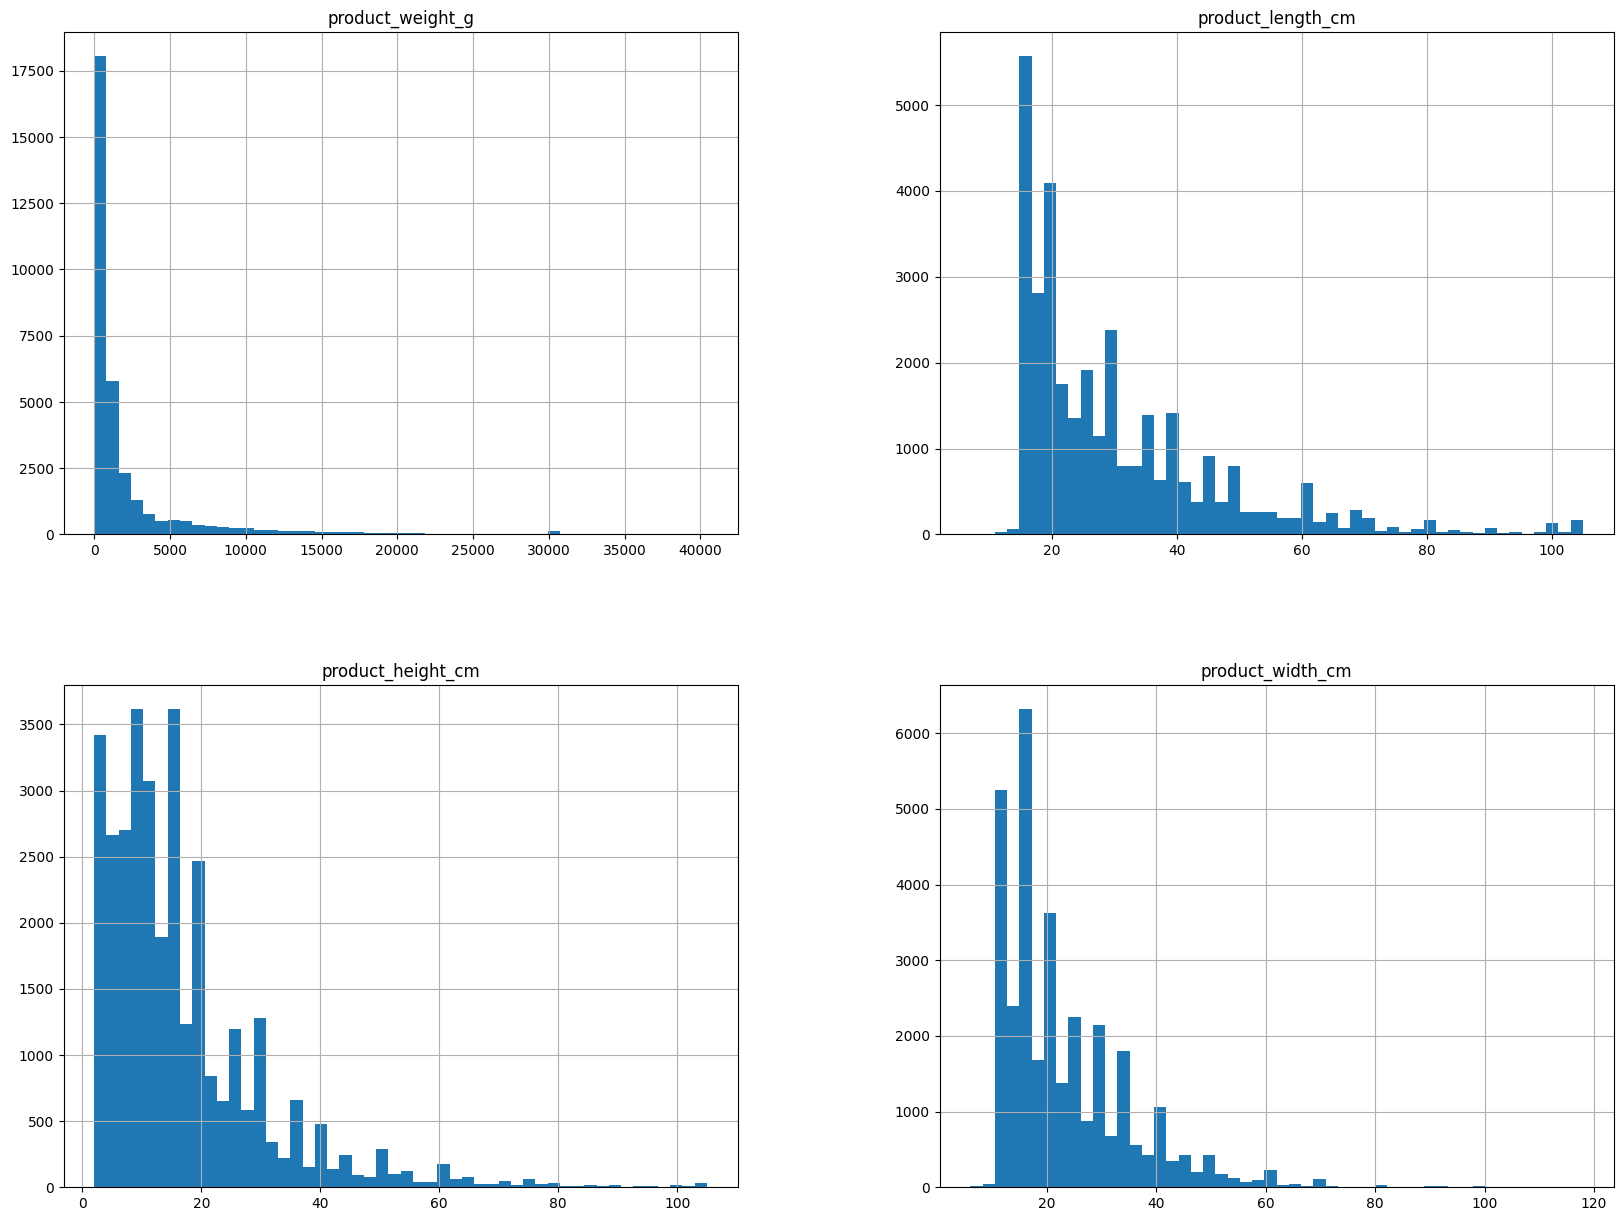

In [37]:
"""
Histogram của cân nặng, chiều dài, chiều rộng, chiều cao sản phẩm
"""

%matplotlib inline
import matplotlib.pyplot as plt

opd.hist(bins = 50, figsize = (20, 15))
plt.show()

In [17]:
"""
Đọc dữ liệu từ file orders và xoá các trường k cần thiết.
"""

ood = pd.read_csv("data/olist_orders_dataset.csv").dropna()
ood = ood[ood['order_status'] == 'delivered']
ood = ood.drop(['order_status', 'order_purchase_timestamp','order_delivered_carrier_date', 'order_approved_at', 'order_delivered_customer_date',
                'order_estimated_delivery_date'], axis = 1)
ood

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c
...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1


In [18]:
"""
Loading dữ liệu đơn hàng và sản phẩm trong đơn hàng đó.
"""

ooid = pd.read_csv("data/olist_order_items_dataset.csv").drop(['order_item_id', 'shipping_limit_date'], axis = 1)
ooid

,order_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


In [19]:
"""
Gộp dữ liệu sản phẩm, khách hàng, nhà bán hàng của từng đơn hàng.
"""

ooid = pd.merge(ooid, ood, left_on = 'order_id', right_on = 'order_id')
ooid = pd.merge(ooid, opd, left_on = 'product_id', right_on = 'product_id', how = 'left')
ooid = pd.merge(ooid, osd, left_on = 'seller_id', right_on = 'seller_id', how = 'left')
ooid = pd.merge(ooid, ocd, left_on = 'customer_id', right_on = 'customer_id', how = 'left', suffixes = ('_seller', '_customer'))
ooid = ooid.drop(columns=['product_id', 'seller_id', 'customer_id'])
ooid

,order_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat_seller,geolocation_lng_seller,geolocation_lat_customer,geolocation_lng_customer
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0,-22.496953,-44.127492,-21.762775,-41.309633
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0,-23.565096,-46.518565,-20.220527,-50.903424
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0,-22.262584,-46.171124,-19.870305,-44.593326
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0,-20.553624,-47.387359,-23.089925,-46.611654
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0,-22.929384,-53.135873,-23.243402,-46.827614
...,...,...,...,...,...,...,...,...,...,...,...,...
110168,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,utilidades_domesticas,10150.0,89.0,15.0,40.0,-26.912574,-48.673980,-2.497993,-44.297761
110169,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,informatica_acessorios,8950.0,45.0,26.0,38.0,-23.535864,-46.642819,-25.566904,-49.309115
110170,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,esporte_lazer,967.0,21.0,24.0,19.0,-25.469955,-49.289821,-23.597794,-46.643923
110171,fffe18544ffabc95dfada21779c9644f,55.99,8.72,informatica_acessorios,100.0,20.0,20.0,20.0,-23.635530,-46.694031,-23.040252,-46.979782


In [20]:
"""
Tính toán khoảng cách giữa nhà bán hàng và khách hàng. Đồng thời trích xuất số đo tối đa và thể tích của đơn hàng
"""
from geopy import distance
ooid['distance'] = ooid.apply(lambda x: distance.distance((x['geolocation_lat_seller'], x['geolocation_lng_seller']),
                                                          (x['geolocation_lat_customer'], x['geolocation_lng_customer'])).km, axis=1)
ooid = ooid.drop(['geolocation_lat_seller', 'geolocation_lng_seller', 'geolocation_lat_customer', 'geolocation_lng_customer'], axis = 1)
ooid['product_max_cm'] = ooid[['product_length_cm', 'product_height_cm', 'product_width_cm']].max(axis = 1)
ooid['product_volume_cm'] = ooid['product_length_cm'] * ooid['product_height_cm'] * ooid['product_width_cm']
ooid = ooid.drop(['product_length_cm', 'product_height_cm', 'product_width_cm'], axis = 1)
ooid = ooid.fillna({'product_category_name':'other'})
ooid

,order_id,price,freight_value,product_category_name,product_weight_g,distance,product_max_cm,product_volume_cm
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,cool_stuff,650.0,301.858959,28.0,3528.0
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,pet_shop,30000.0,585.131104,50.0,60000.0
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,moveis_decoracao,3050.0,311.506212,33.0,14157.0
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,perfumaria,200.0,292.064162,16.0,2400.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,ferramentas_jardim,3750.0,647.209811,40.0,42000.0
...,...,...,...,...,...,...,...,...
110168,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,utilidades_domesticas,10150.0,2741.786140,89.0,53400.0
110169,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,informatica_acessorios,8950.0,351.523090,45.0,44460.0
110170,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,esporte_lazer,967.0,338.924030,24.0,9576.0
110171,fffe18544ffabc95dfada21779c9644f,55.99,8.72,informatica_acessorios,100.0,72.112500,20.0,8000.0


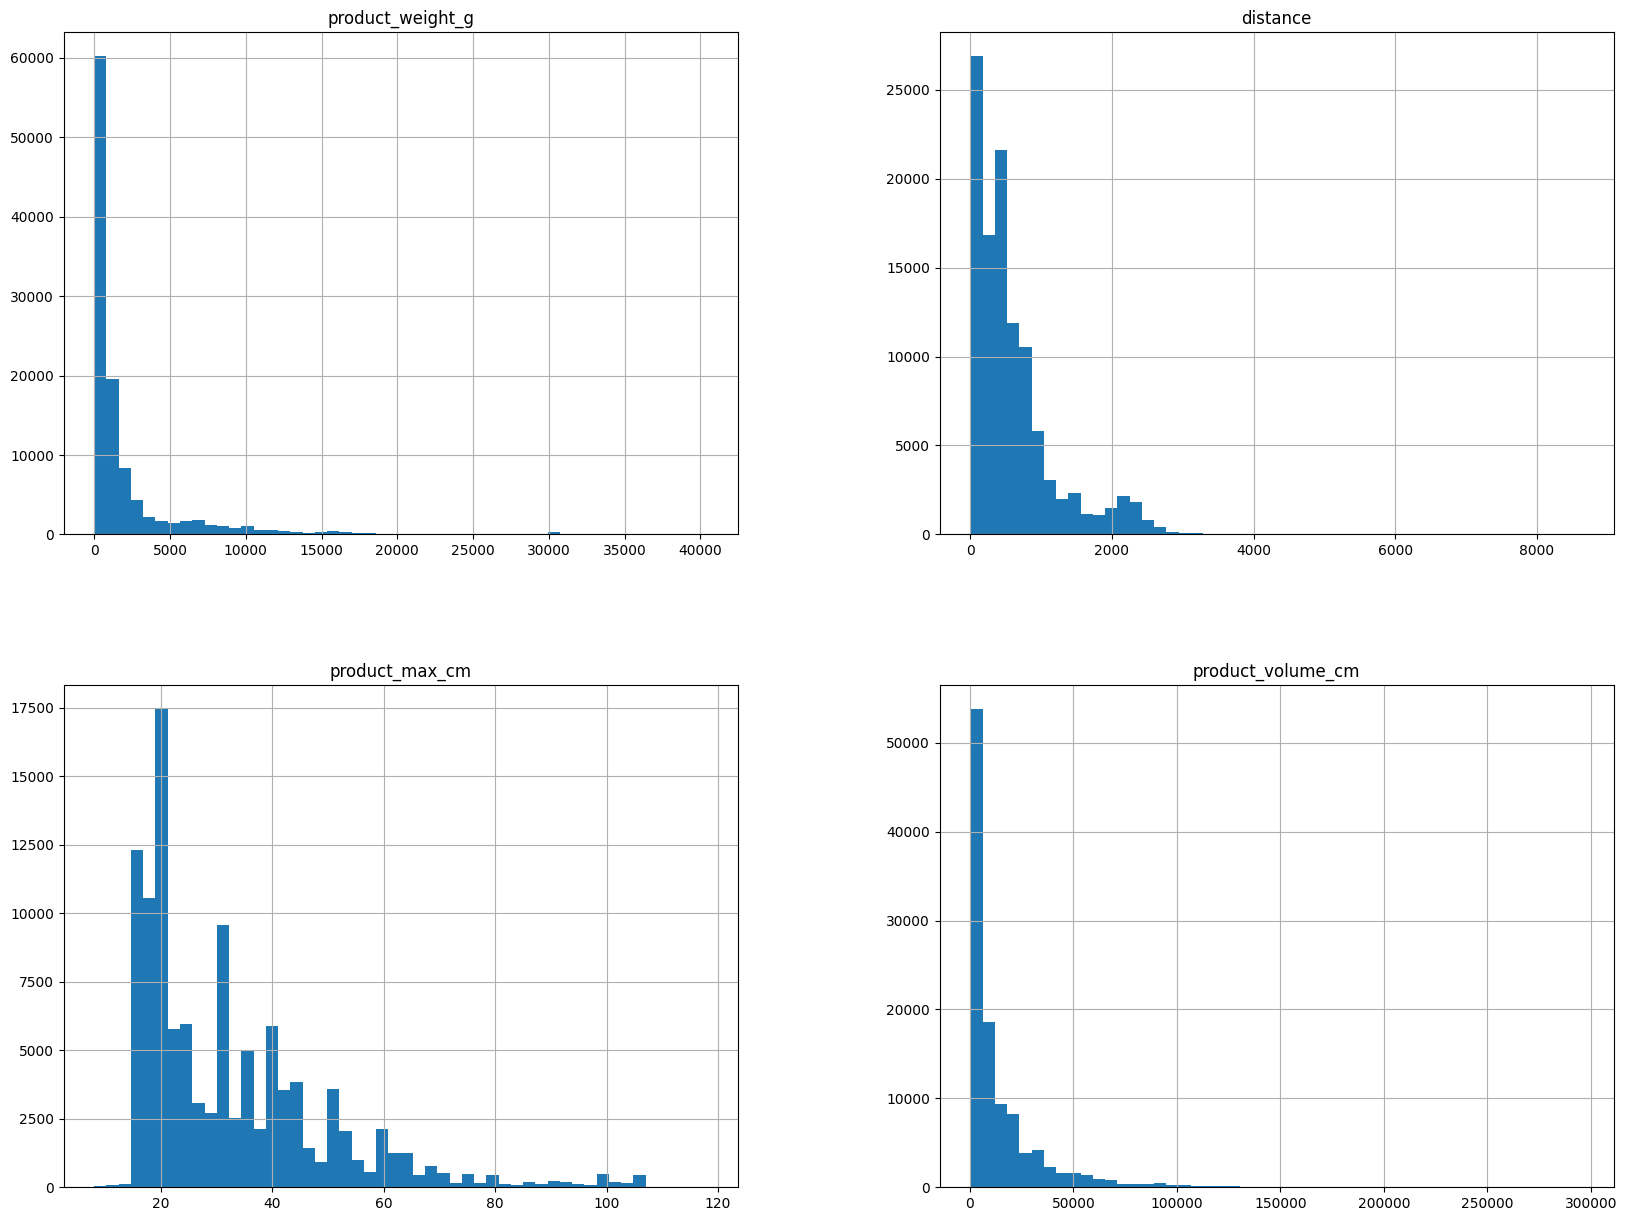

In [42]:
"""
Histogram biểu diễn cân nặng, khoảng cách, độ đo lớn nhất và thể tích của sản phẩm trong đơn hàng.
"""

ooid[['product_weight_g', 'distance', 'product_max_cm', 'product_volume_cm']].hist(bins = 50, figsize = (20, 15))
plt.show()

In [21]:
"""
Tổng hợp dữ liệu về sản phẩm dựa trên đơn hàng và các item trong đơn hàng
"""

ooid = ooid.groupby('order_id').agg({ 'product_weight_g': ['max', 'sum'], 'distance': [ 'sum'], 'product_max_cm': ['max'],
                                     'product_volume_cm': ['max', 'sum']})
ooid = ooid.dropna()
ooid.columns = [ 'product_weight_g_max','product_weight_g_sum', 'distance_sum', 'product_max_cm', 'product_volume_cm_max', 'product_volume_cm_sum']
ooid

,product_weight_g_max,product_weight_g_sum,distance_sum,product_max_cm,product_volume_cm_max,product_volume_cm_sum
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,650.0,650.0,301.858959,28.0,3528.0,3528.0
00018f77f2f0320c557190d7a144bdd3,30000.0,30000.0,585.131104,50.0,60000.0,60000.0
000229ec398224ef6ca0657da4fc703e,3050.0,3050.0,311.506212,33.0,14157.0,14157.0
00024acbcdf0a6daa1e931b038114c75,200.0,200.0,292.064162,16.0,2400.0,2400.0
00042b26cf59d7ce69dfabb4e55b4fd9,3750.0,3750.0,647.209811,40.0,42000.0,42000.0
...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,10150.0,10150.0,2741.786140,89.0,53400.0,53400.0
fffcd46ef2263f404302a634eb57f7eb,8950.0,8950.0,351.523090,45.0,44460.0,44460.0
fffce4705a9662cd70adb13d4a31832d,967.0,967.0,338.924030,24.0,9576.0,9576.0


In [10]:
"""
Đọc dữ liệu từ file order
"""

ood = pd.read_csv("data/olist_orders_dataset.csv", parse_dates = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']).dropna()
ood = ood[ood['order_status'] == 'delivered']
ood = ood.drop(['customer_id', 'order_status', 'order_approved_at', 'order_purchase_timestamp'], axis = 1)
ood

,order_id,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [11]:
"""
Tính toán năm, tháng, ngày, thứ của ngày vận chuyển. Thêm trường ontime
"""

ood['order_delivered_carrier_year'] = ood['order_delivered_carrier_date'].dt.year
ood['order_delivered_carrier_month'] = ood['order_delivered_carrier_date'].dt.month
ood['order_delivered_carrier_day'] = ood['order_delivered_carrier_date'].dt.day
ood['order_delivered_carrier_dayofweek'] = ood['order_delivered_carrier_date'].dt.dayofweek
# ood['order_delivered_carrier_hour'] = ood['order_delivered_carrier_date'].dt.hour
ood['order_estimated_hour'] = round((ood['order_estimated_delivery_date'] - ood['order_delivered_carrier_date']).dt.total_seconds()/3600,2)
ood['on_time'] = ood['order_delivered_customer_date'] < ood['order_estimated_delivery_date']
ood['on_time'] = ood['on_time'].replace({True:1, False:0})
ood = ood.drop(['order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis = 1)
ood

,order_id,order_delivered_carrier_year,order_delivered_carrier_month,order_delivered_carrier_day,order_delivered_carrier_dayofweek,order_estimated_hour,on_time
0,e481f51cbdc54678b7cc49136f2d6af7,2017,10,4,2,316.08,1
1,53cdb2fc8bc7dce0b6741e2150273451,2018,7,26,3,417.48,1
2,47770eb9100c2d0c44946d9cf07ec65d,2018,8,8,2,634.17,1
3,949d5b44dbf5de918fe9c16f97b45f8a,2017,11,22,2,538.33,1
4,ad21c59c0840e6cb83a9ceb5573f8159,2018,2,14,2,268.22,1
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017,3,10,4,420.70,1
99437,63943bddc261676b46f01ca7ac2f7bd8,2018,2,7,2,528.62,1
99438,83c1379a015df1e13d02aae0204711ab,2017,8,28,0,699.13,1
99439,11c177c8e97725db2631073c19f07b62,2018,1,12,4,800.42,1


In [79]:
ood['on_time'].value_counts()

on_time
1    88630
0     7825
Name: count, dtype: int64

In [12]:
"""
Kết hợp bảng order và order item
"""
import numpy
data = pd.merge(ood, ooid, left_on = 'order_id', right_index = True)
data = data.set_index('order_id')
numpy.savetxt("data.csv", data, delimiter=",")
data

,order_delivered_carrier_year,order_delivered_carrier_month,order_delivered_carrier_day,order_delivered_carrier_dayofweek,order_estimated_hour,on_time,product_weight_g_max,product_weight_g_sum,distance_sum,product_max_cm_sum,product_volume_cm_max,product_volume_cm_sum
order_id,,,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,2017,10,4,2,316.08,1,500.0,500.0,18.566632,19.0,1976.0,1976.0
53cdb2fc8bc7dce0b6741e2150273451,2018,7,26,3,417.48,1,400.0,400.0,847.437333,19.0,4693.0,4693.0
47770eb9100c2d0c44946d9cf07ec65d,2018,8,8,2,634.17,1,420.0,420.0,512.100044,24.0,9576.0,9576.0
949d5b44dbf5de918fe9c16f97b45f8a,2017,11,22,2,538.33,1,450.0,450.0,1816.085655,30.0,6000.0,6000.0
ad21c59c0840e6cb83a9ceb5573f8159,2018,2,14,2,268.22,1,250.0,250.0,29.684401,51.0,11475.0,11475.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9c5dedf39a927c1b2549525ed64a053c,2017,3,10,4,420.70,1,1175.0,1175.0,69.822123,22.0,5148.0,5148.0
63943bddc261676b46f01ca7ac2f7bd8,2018,2,7,2,528.62,1,4950.0,4950.0,474.258311,40.0,16000.0,16000.0
83c1379a015df1e13d02aae0204711ab,2017,8,28,0,699.13,1,13300.0,13300.0,966.946999,90.0,63360.0,63360.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96439 entries, e481f51cbdc54678b7cc49136f2d6af7 to 66dea50a8b16d9b4dee7af250b4be1a5
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   order_delivered_carrier_year       96439 non-null  int32  
 1   order_delivered_carrier_month      96439 non-null  int32  
 2   order_delivered_carrier_day        96439 non-null  int32  
 3   order_delivered_carrier_dayofweek  96439 non-null  int32  
 4   order_estimated_hour               96439 non-null  float64
 5   on_time                            96439 non-null  int64  
 6   product_weight_g_max               96439 non-null  float64
 7   product_weight_g_sum               96439 non-null  float64
 8   distance_sum                       96439 non-null  float64
 9   product_max_cm_sum                 96439 non-null  float64
 10  product_volume_cm_max              96439 non-null  float64
 11  p

In [14]:
data[['product_weight_g_max', 'product_weight_g_sum', 'product_max_cm_sum', 'product_volume_cm_max', 'product_volume_cm_sum']].describe()

,product_weight_g_max,product_weight_g_sum,product_max_cm_sum,product_volume_cm_max,product_volume_cm_sum
count,96439.000000,96439.000000,96439.000000,96439.000000,9.643900e+04
mean,2120.418752,2386.746938,37.030797,15300.242402,1.733137e+04
std,3777.692847,4770.060699,28.441888,23430.862060,3.014400e+04
min,0.000000,0.000000,8.000000,168.000000,1.680000e+02
25%,300.000000,300.000000,20.000000,2816.000000,2.964000e+03
50%,700.000000,750.000000,30.000000,6468.000000,7.252000e+03
75%,1825.000000,2050.000000,45.000000,18576.000000,1.986600e+04
max,40425.000000,184400.000000,954.000000,296208.000000,1.476000e+06


In [30]:
X = data.loc[:, data.columns != 'on_time'].values
y = data['on_time'].values
print(X)

[[2.017e+03 1.000e+01 4.000e+00 ... 1.900e+01 1.976e+03 1.976e+03]
 [2.018e+03 7.000e+00 2.600e+01 ... 1.900e+01 4.693e+03 4.693e+03]
 [2.018e+03 8.000e+00 8.000e+00 ... 2.400e+01 9.576e+03 9.576e+03]
 ...
 [2.017e+03 8.000e+00 2.800e+01 ... 9.000e+01 6.336e+04 6.336e+04]
 [2.018e+03 1.000e+00 1.200e+01 ... 4.000e+01 8.000e+03 1.600e+04]
 [2.018e+03 3.000e+00 9.000e+00 ... 1.600e+01 1.680e+03 1.680e+03]]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [16]:
import pickle

with open('X_train.pickle', 'wb') as fp:
    pickle.dump(X_train, fp)
with open('X_test.pickle', 'wb') as fp:
    pickle.dump(X_test, fp)
with open('X_val.pickle', 'wb') as fp:
    pickle.dump(X_val, fp)   
with open('y_train.pickle', 'wb') as fp:
    pickle.dump(y_train, fp)
with open('y_test.pickle', 'wb') as fp:
    pickle.dump(y_test, fp)
with open('y_val.pickle', 'wb') as fp:
    pickle.dump(y_val, fp)

In [52]:
import numpy
numpy.savetxt("traindata.csv", X_train, delimiter=",")